# **PyTorch Tutorial**

In [63]:
from typing import Callable

In this tutorial, we will stick to a very simple and familiar problem: linear regression with a single feature $x$.
This allows us to fully concentrate on the working of PyTorch and not be distracted by of pre- and post-processing work as necessary for problems such as image or gene classification.

This is our simple linear regression model:

$$y = a + bx$$

# Data Generation

We start by generating some synthetic data.
We generate 100 random values for our feature $x$, and we create labels using $a=1$, $b=2$ and some Gaussian noise. 

In [64]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(seed=42)

x = np.random.rand(100, 1)
a = 1
b = 2
y = a + b * x + 0.1 * np.random.randn(100, 1)

##### ❓ Training and validation set

Split the data randomly into a training set (80%) and a validation set (20%).

In [65]:
# Create a list of shuffled indices.
idx = np.arange(100)
np.random.shuffle(x=idx)

# The first 80% are the training indices; the remaining 20% are the validation
# indices.
train_idx = idx[:80]
val_idx = idx[80:]

# Generate training set and validation set.
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

##### ❓ Visualize the data

Visualize the training and validations sets as scatter plots.

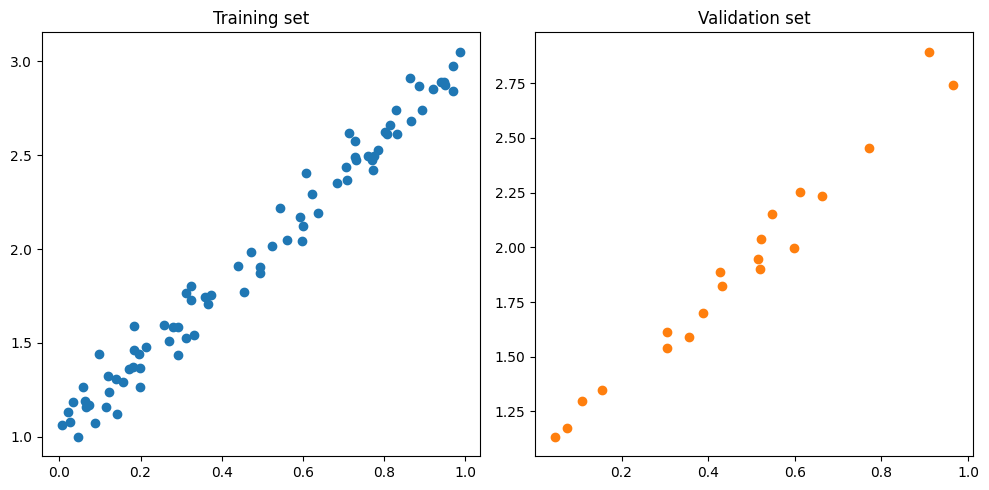

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.scatter(x=x_train, y=y_train, c="tab:blue")
ax1.set_title("Training set")
ax2.scatter(x=x_val, y=y_val, c="tab:orange")
ax2.set_title("Validation set")
plt.tight_layout()
plt.show()

# Linear Regression in NumPy

We _know_ that $a=1$ and $b=2$, but now let’s see how close we can get to the true values by using gradient descent and the 80 points in the training set using NumPy only.

We will use Mean Squared Error (MSE) as loss function $L$:

$$L = \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2$$

Our model output $\hat{y}_i$ for sample $i$ is defined by:

$$\hat{y}_i = a + bx_i$$

This yields:

$$L = \frac{1}{N} \sum_{i=1}^{N} (a + bx_i - y_i)^2$$

The partial derivatives of $L$ w.r.t. $a$ and $b$ are:

$$\frac{\partial L}{\partial a} = 2 \cdot \frac{1}{N} \sum_{i=1}^{N} (a + bx_i - y_i)  = 2 \cdot \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)$$

$$\frac{\partial L}{\partial b} = 2 \cdot \frac{1}{N} \sum_{i=1}^{N} x_i \cdot (a + bx_i - y_i) = 2 \cdot \frac{1}{N} \sum_{i=1}^{N} x_i \cdot (\hat{y}_i - y_i)$$

##### ❓ Linear regression in NumPy

Complete the following code.

In [67]:
# Initialize parameters a and b randomly.
np.random.seed(seed=42)  # for reproducibility
a = np.random.randn(1)
b = np.random.randn(1)
print(f"After initialization: a={a}, b={b}")

# Set hyperparameters:
# - Learning rate
# - No. of epochs. An epoch is one complete iteration through the entire
#   training dataset.
lr = 0.1
n_epochs = 1000
print(f"Learning rate: {lr}")
print(f"No. of epochs: {n_epochs}")

# For each epoch, there are four training steps:
# 1. Compute the model's predictions - forward pass
# 2. Compute the loss, using the model's predictions and the labels and the
#    loss function (MSE)
# 3. Compute the partial derivatives of the loss function w.r.t. every
#    parameter
# 4. Update the parameters
for epoch in range(n_epochs):
    # 1. Compute the model's predictions - forward pass.
    y_hat = a + b * x_train

    # 2. Compute the loss.
    loss = ((y_hat - y_train) ** 2).mean()

    # 3. Compute the partial derivatives of the loss function.
    a_grad = 2 * (y_hat - y_train).mean()
    b_grad = 2 * (x_train * (y_hat - y_train)).mean()

    # 4. Update the parameters.
    a = a - lr * a_grad
    b = b - lr * b_grad

    # 5. Status output.
    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(
            f"Epoch [{epoch:5}/{n_epochs:5}], Loss={loss:8f}, a={a[0]:8f}, b={b[0]:8f}"
        )

After initialization: a=[0.49671415], b=[-0.1382643]
Learning rate: 0.1
No. of epochs: 1000
Epoch [    0/ 1000], Loss=2.742158, a=0.801195, b=0.045111
Epoch [  100/ 1000], Loss=0.017680, a=1.183618, b=1.655740
Epoch [  200/ 1000], Loss=0.008504, a=1.058473, b=1.900611
Epoch [  300/ 1000], Loss=0.008067, a=1.031164, b=1.954048
Epoch [  400/ 1000], Loss=0.008046, a=1.025204, b=1.965709
Epoch [  500/ 1000], Loss=0.008045, a=1.023904, b=1.968254
Epoch [  600/ 1000], Loss=0.008045, a=1.023620, b=1.968809
Epoch [  700/ 1000], Loss=0.008045, a=1.023558, b=1.968931
Epoch [  800/ 1000], Loss=0.008045, a=1.023545, b=1.968957
Epoch [  900/ 1000], Loss=0.008045, a=1.023542, b=1.968963
Epoch [  999/ 1000], Loss=0.008045, a=1.023541, b=1.968964


##### ❓ Linear regression in scikit-learn

Verify the results by comparing it to scikit-learn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model.

> In a LinearRegression model named `regressor`, the parameters relevant to us are accessible as `regressor.intercept_` (for $a$) and `regressor.coef_` (for $b$).

In [68]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X=x_train, y=y_train)
print(regressor.intercept_, regressor.coef_)

[1.02354075] [[1.96896447]]


# Linear Regression With PyTorch

As a first step, we need to convert our input data, which is in the form of NumPy arrays, into PyTorch tensors.

## Tensors

In PyTorch, tensors are multi-dimensional arrays that are the fundamental data structures for representing and working with data.
Tensors in PyTorch are similar to NumPy arrays, but they have the added benefit of being compatible with GPU acceleration, making them a key component for deep learning and neural network computations.

One of the distinguishing features of PyTorch is its automatic differentiation capability, which is built on top of tensors.
PyTorch keeps track of operations performed on tensors and allows you to compute gradients automatically for purposes like training neural networks using backpropagation.

PyTorch tensors can be seamlessly moved to and operated on by GPUs, enabling faster computation for large-scale deep learning tasks.
This feature is essential for training complex neural networks on GPU hardware.
However, here we will perform all operations on CPUs.

In any case, for completeness, let's check for [CUDA](https://en.wikipedia.org/wiki/CUDA) (i.e., Nvidia GPU) support:

In [69]:
import torch

device = "cpu"
if torch.cuda.is_available():
    print("CUDA is available on your system.")
    device = "cuda"
else:
    print("CUDA is not available on your system.")

CUDA is available on your system.


Next, let's transform our training data into PyTorch tensors:

In [70]:
x_train_tensor = torch.from_numpy(x_train).to(device=device, dtype=torch.float32)
y_train_tensor = torch.from_numpy(y_train).to(device=device, dtype=torch.float32)

But what distinguishes a tensor used for data&mdash;like the ones we have just created&mdash;from a tensor used as a (trainable) parameter?

The latter tensors require the computation of its gradients, so we can update their values.
That's what the `requires_grad=True` argument is good for.
It tells PyTorch we want it to compute gradients for us.

So let's create appropriate tensors for our parameters $a$ and $b$.

In [71]:
# We can specify the device (CPU, GPU) at the moment of creation - recommended!
torch.manual_seed(seed=42)
a = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)
print(f"a: {a}")
print(f"b: {b}")

a: tensor([0.1940], device='cuda:0', requires_grad=True)
b: tensor([0.1391], device='cuda:0', requires_grad=True)


## Computation of Gradients

Now that we know how to create tensors that require gradients, let's see how PyTorch handles them.

[Autograd](https://pytorch.org/docs/stable/autograd.html) is PyTorch’s automatic differentiation package.
Thanks to it, we don’t need to worry about partial derivatives, chain rule, etc. anymore.

So, how do we tell PyTorch to do its thing and compute all partial derivatives?
That’s what [`backward()`](https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward) is good for.
([Click here for further reading on automatic differentiation.](https://en.wikipedia.org/wiki/Automatic_differentiation))
It uses reverse-mode automatic differentiation.
Hence, we need to invoke the `backward()` method from our `loss` variable.

##### ❓ A first linear regression implementation in PyTorch

Complete the following code.
Pay attention to use only PyTorch tensors.

In [72]:
# Initialize parameters a and b randomly.
torch.manual_seed(seed=42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Set hyperparameters.
lr = 0.1
n_epochs = 1000

# For each epoch, there are four training steps.
for epoch in range(n_epochs):
    # 1. Compute the model's predictions - forward pass.
    y_hat = a + b * x_train_tensor

    # 2. Compute the loss.
    loss = ((y_hat - y_train_tensor) ** 2).mean()

    # 3. Compute the partial derivatives of the loss function.
    loss.backward()

    # 4. Update the parameters.
    #
    # (PyTorch modifies computation graphs from every Python operation that
    # involves any gradient-computing tensor or its dependencies. Hence, we
    # need to tell it to 'back off' during our parameter update. Also, with
    # backward(), gradients are accumulated. So, every time we use the
    # gradients to update the parameters, we need to zero the gradients
    # afterwards. NB: PyTorch functions with a trailing underscore - such as
    # zero_() - perform their operations in-place.)
    with torch.no_grad():
        if a.grad is not None:
            a -= lr * a.grad
        if b.grad is not None:
            b -= lr * b.grad
    if a.grad is not None:
        a.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()

    # 5. Status output.
    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(
            f"Epoch [{epoch:5}/{n_epochs:5}], Loss={loss:8f}, a={a[0]:8f}, b={b[0]:8f}"
        )

Epoch [    0/ 1000], Loss=3.191796, a=0.532827, b=0.333528
Epoch [  100/ 1000], Loss=0.013682, a=1.145985, b=1.729377
Epoch [  200/ 1000], Loss=0.008313, a=1.050261, b=1.916681
Epoch [  300/ 1000], Loss=0.008057, a=1.029372, b=1.957555
Epoch [  400/ 1000], Loss=0.008045, a=1.024813, b=1.966475
Epoch [  500/ 1000], Loss=0.008045, a=1.023818, b=1.968421
Epoch [  600/ 1000], Loss=0.008045, a=1.023601, b=1.968846
Epoch [  700/ 1000], Loss=0.008045, a=1.023554, b=1.968938
Epoch [  800/ 1000], Loss=0.008045, a=1.023544, b=1.968959
Epoch [  900/ 1000], Loss=0.008045, a=1.023543, b=1.968960
Epoch [  999/ 1000], Loss=0.008045, a=1.023543, b=1.968960


## Optimizer

So far, we manually updated our parameters ($a$ and $b$) using the computed gradients.
In the case that we have many more parameters, it is more convenient to use one of PyTorch's optimizers, such as [`SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) (Stochastic Gradient Descent).

An optimizer takes the parameters we want to update, the learning rate we want to use (and possibly many other hyperparameters) and performs the updates through its [`step()`](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html#torch.optim.Optimizer.step) method.

Also, we do not need to zero the gradient one by one anymore; we can use the optimizer's [`zero_grad()`](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html#torch.optim.Optimizer.zero_grad) method.

##### ❓ Using an optimizer in PyTorch

Complete the following code using PyTorch's `SGD`.
Pay attention to correctly pass our parameters ($a$ and $b$) (as a simple list) and the learning rate to the optimizer.

In [73]:
# Initialize parameters a and b randomly.
torch.manual_seed(seed=42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Set hyperparameters.
lr = 0.1
n_epochs = 1000

# Define an optimizer.
optimizer = torch.optim.SGD(params=[a, b], lr=lr)

# For each epoch, there are four training steps.
for epoch in range(n_epochs):
    # 1. Compute the model's predictions - forward pass.
    y_hat = a + b * x_train_tensor

    # 2. Compute the loss.
    loss = ((y_hat - y_train_tensor) ** 2).mean()

    # 3. Compute the partial derivatives of the loss function.
    loss.backward()

    # 4. Update the parameters.
    optimizer.step()
    optimizer.zero_grad()

    # 5. Status output.
    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(
            f"Epoch [{epoch:5}/{n_epochs:5}], Loss={loss:8f}, a={a[0]:8f}, b={b[0]:8f}"
        )

Epoch [    0/ 1000], Loss=3.191796, a=0.532827, b=0.333528
Epoch [  100/ 1000], Loss=0.013682, a=1.145985, b=1.729377
Epoch [  200/ 1000], Loss=0.008313, a=1.050261, b=1.916681
Epoch [  300/ 1000], Loss=0.008057, a=1.029372, b=1.957555
Epoch [  400/ 1000], Loss=0.008045, a=1.024813, b=1.966475
Epoch [  500/ 1000], Loss=0.008045, a=1.023818, b=1.968421
Epoch [  600/ 1000], Loss=0.008045, a=1.023601, b=1.968846
Epoch [  700/ 1000], Loss=0.008045, a=1.023554, b=1.968938
Epoch [  800/ 1000], Loss=0.008045, a=1.023544, b=1.968959
Epoch [  900/ 1000], Loss=0.008045, a=1.023543, b=1.968960
Epoch [  999/ 1000], Loss=0.008045, a=1.023543, b=1.968960


## Loss

We also do not need to manually calculate our loss.
Instead, we can use PyTorch to generate a loss function for us.
Here we will use [`MSELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss).

##### ❓ Using a loss function from PyTorch

Complete the following code using `MSELoss()`.
Note that `MSELoss()` returns the appropriately initialized loss function, which later has to be called to compute the actual loss.

In [74]:
# Initialize parameters a and b randomly.
torch.manual_seed(seed=42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Set hyperparameters.
lr = 0.1
n_epochs = 1000

# Define an optimizer.
optimizer = torch.optim.SGD(params=[a, b], lr=lr)

# Define a loss function.
loss_fn = torch.nn.MSELoss()

# For each epoch, there are four training steps.
for epoch in range(n_epochs):
    # 1. Compute the model's predictions - forward pass.
    y_hat = a + b * x_train_tensor

    # 2. Compute the loss.
    loss = loss_fn(y_hat, y_train_tensor)

    # 3. Compute the partial derivatives of the loss function.
    loss.backward()

    # 4. Update the parameters.
    optimizer.step()
    optimizer.zero_grad()

    # 5. Status output.
    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(
            f"Epoch [{epoch:5}/{n_epochs:5}], Loss={loss:8f}, a={a[0]:8f}, b={b[0]:8f}"
        )

Epoch [    0/ 1000], Loss=3.191796, a=0.532827, b=0.333528
Epoch [  100/ 1000], Loss=0.013682, a=1.145985, b=1.729377
Epoch [  200/ 1000], Loss=0.008313, a=1.050261, b=1.916681
Epoch [  300/ 1000], Loss=0.008057, a=1.029372, b=1.957555
Epoch [  400/ 1000], Loss=0.008045, a=1.024813, b=1.966475
Epoch [  500/ 1000], Loss=0.008045, a=1.023818, b=1.968421
Epoch [  600/ 1000], Loss=0.008045, a=1.023601, b=1.968846
Epoch [  700/ 1000], Loss=0.008045, a=1.023554, b=1.968938
Epoch [  800/ 1000], Loss=0.008045, a=1.023544, b=1.968959
Epoch [  900/ 1000], Loss=0.008045, a=1.023543, b=1.968960
Epoch [  999/ 1000], Loss=0.008045, a=1.023543, b=1.968960


## Model

At this step, the only thing left to be "transformed" to PyTorch code is the forward pass.
Hence, we define our own PyTorch model.

In PyTorch, a model is represented by a regular Python class that inherits from the [`Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) class.

The most fundamental methods it needs to implement are:

- `__init__()`: it defines the parts that make up the model. In our case these are the two parameters $a$ and $b$.
- `forward()`: it performs the actual computation.

In [75]:
class ManualLinearRegression(torch.nn.Module):
    """Class for a manual linear regression model."""

    def __init__(self) -> None:
        """Initialize the model."""
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap
        # them with torch.nn.Parameter.
        self.a = torch.nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.b = torch.nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass of the model."""
        return self.a + self.b * x

##### ❓ Using a custom PyTorch model

Complete the following code using our newly defined model.
Pay attention to initialize the optimizer with the new model parameters, which can be accessed through [`parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).

In [76]:
torch.manual_seed(seed=42)

model = ManualLinearRegression().to(device)
lr = 0.1
n_epochs = 1000

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss()

for epoch in range(n_epochs):
    model.train()  # set the model to training mode
    y_hat = model(x_train_tensor)
    loss = loss_fn(y_hat, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(f"Epoch [{epoch:5}/{n_epochs:5}], Loss={loss:8f}, {model.state_dict()}")

Epoch [    0/ 1000], Loss=2.747487, OrderedDict({'a': tensor([0.6479], device='cuda:0'), 'b': tensor([0.3104], device='cuda:0')})
Epoch [  100/ 1000], Loss=0.014369, OrderedDict({'a': tensor([1.1532], device='cuda:0'), 'b': tensor([1.7152], device='cuda:0')})
Epoch [  200/ 1000], Loss=0.008346, OrderedDict({'a': tensor([1.0518], device='cuda:0'), 'b': tensor([1.9136], device='cuda:0')})
Epoch [  300/ 1000], Loss=0.008059, OrderedDict({'a': tensor([1.0297], device='cuda:0'), 'b': tensor([1.9569], device='cuda:0')})
Epoch [  400/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0249], device='cuda:0'), 'b': tensor([1.9663], device='cuda:0')})
Epoch [  500/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0238], device='cuda:0'), 'b': tensor([1.9684], device='cuda:0')})
Epoch [  600/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0236], device='cuda:0'), 'b': tensor([1.9688], device='cuda:0')})
Epoch [  700/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0236], device='cuda:0'), '

## Evaluation

At this point, it can be convenient to move our training code into its own function.

In [77]:
torch.manual_seed(seed=42)


def make_train_step(
    model: torch.nn.Module,
    loss_fn: torch.nn.modules.loss._Loss,
    optimizer: torch.optim.Optimizer,
) -> Callable:
    """Create a function that performs a training step."""

    def train_step(x: torch.Tensor, y: torch.Tensor) -> float:
        model.train()
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()

    return train_step


lr = 0.1
model = ManualLinearRegression().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss()
train_step = make_train_step(model=model, loss_fn=loss_fn, optimizer=optimizer)
n_epochs = 1000

for epoch in range(n_epochs):
    loss = train_step(x=x_train_tensor, y=y_train_tensor)

    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(f"Epoch [{epoch:5}/{n_epochs:5}], Loss={loss:8f}, {model.state_dict()}")

Epoch [    0/ 1000], Loss=2.747487, OrderedDict({'a': tensor([0.6479], device='cuda:0'), 'b': tensor([0.3104], device='cuda:0')})
Epoch [  100/ 1000], Loss=0.014369, OrderedDict({'a': tensor([1.1532], device='cuda:0'), 'b': tensor([1.7152], device='cuda:0')})
Epoch [  200/ 1000], Loss=0.008346, OrderedDict({'a': tensor([1.0518], device='cuda:0'), 'b': tensor([1.9136], device='cuda:0')})
Epoch [  300/ 1000], Loss=0.008059, OrderedDict({'a': tensor([1.0297], device='cuda:0'), 'b': tensor([1.9569], device='cuda:0')})
Epoch [  400/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0249], device='cuda:0'), 'b': tensor([1.9663], device='cuda:0')})
Epoch [  500/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0238], device='cuda:0'), 'b': tensor([1.9684], device='cuda:0')})
Epoch [  600/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0236], device='cuda:0'), 'b': tensor([1.9688], device='cuda:0')})
Epoch [  700/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0236], device='cuda:0'), '

To evaluate our model, we also need to convert our validation data into PyTorch tensors:

In [78]:
x_val_tensor = torch.from_numpy(x_val).to(device, dtype=torch.float32)
y_val_tensor = torch.from_numpy(y_val).to(device, dtype=torch.float32)

##### ❓ Evaluation

Perform the model evaluation in every epoch.
Also, track the validation losses.

In [79]:
torch.manual_seed(seed=42)


def make_train_step(
    model: torch.nn.Module,
    loss_fn: torch.nn.modules.loss._Loss,
    optimizer: torch.optim.Optimizer,
) -> Callable:
    """Create a function that performs a training step."""

    def train_step(x: torch.Tensor, y: torch.Tensor) -> float:
        model.train()
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()

    return train_step


lr = 0.1
model = ManualLinearRegression().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss()
train_step = make_train_step(model=model, loss_fn=loss_fn, optimizer=optimizer)
n_epochs = 1000

train_losses = []
val_losses = []

for epoch in range(n_epochs):
    loss = train_step(x=x_train_tensor, y=y_train_tensor)
    train_losses.append(loss)

    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(f"Epoch [{epoch:5}/{n_epochs:5}], Loss={loss:8f}, {model.state_dict()}")

    with torch.no_grad():
        model.eval()
        y_hat = model(x_val_tensor)
        val_loss = loss_fn(y_hat, y_val_tensor)
        val_losses.append(val_loss.item())

Epoch [    0/ 1000], Loss=2.747487, OrderedDict({'a': tensor([0.6479], device='cuda:0'), 'b': tensor([0.3104], device='cuda:0')})
Epoch [  100/ 1000], Loss=0.014369, OrderedDict({'a': tensor([1.1532], device='cuda:0'), 'b': tensor([1.7152], device='cuda:0')})
Epoch [  200/ 1000], Loss=0.008346, OrderedDict({'a': tensor([1.0518], device='cuda:0'), 'b': tensor([1.9136], device='cuda:0')})
Epoch [  300/ 1000], Loss=0.008059, OrderedDict({'a': tensor([1.0297], device='cuda:0'), 'b': tensor([1.9569], device='cuda:0')})
Epoch [  400/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0249], device='cuda:0'), 'b': tensor([1.9663], device='cuda:0')})
Epoch [  500/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0238], device='cuda:0'), 'b': tensor([1.9684], device='cuda:0')})
Epoch [  600/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0236], device='cuda:0'), 'b': tensor([1.9688], device='cuda:0')})
Epoch [  700/ 1000], Loss=0.008045, OrderedDict({'a': tensor([1.0236], device='cuda:0'), '

##### ❓ Visualization of training and validation losses

Finally, we can inspect the training and validation losses visually.
Plot the training and validation losses in a single figure for the first 50 epochs.

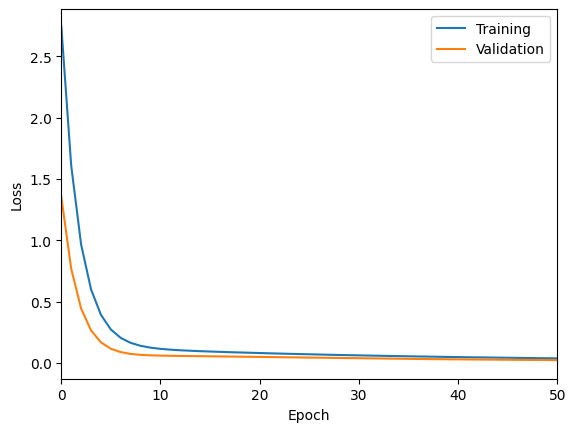

In [80]:
plt.plot(train_losses, color="tab:blue", label="Training")
plt.plot(val_losses, color="tab:orange", label="Validation")
plt.xlim(0, 50)
plt.xlabel(xlabel="Epoch")
plt.ylabel(ylabel="Loss")
plt.legend()
plt.show()